# Class 1 - Phase identification - Single-Bus structure

## Agenda
- Problem Description
- Problem Implementation
- Alternative Problems
- Wrap-Up

## Problem Description

- While the connectivity model of low voltage (LV) grids is usually known, the phase connectivity information of single-phase connected customers is often erroneous or missing. This is due to many reasons including maintenance and other load balancing initiatives that usually do not update phase connectivity information and do not keep track of its changes in a systematic way.

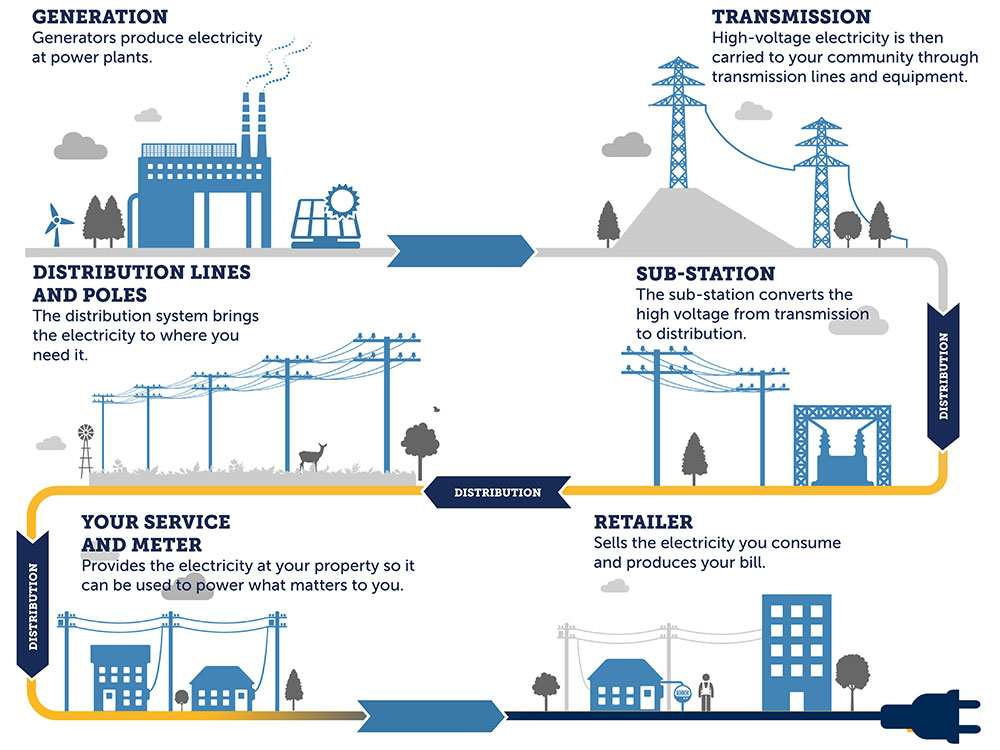
https://www.fortisalberta.com/about-us/our-company/blog/fortisalbertablog/2019/08/20/we-explain-the-complex-sophisticated-system-that-brings-electricity-to-you




- With the deployment of smart metering and the consequent availability
of high-resolution consumption data, phase connectivity
should be possible to estimate if data on per-phase aggregate energy
measurements would be available at substation sites with the
same resolutio.

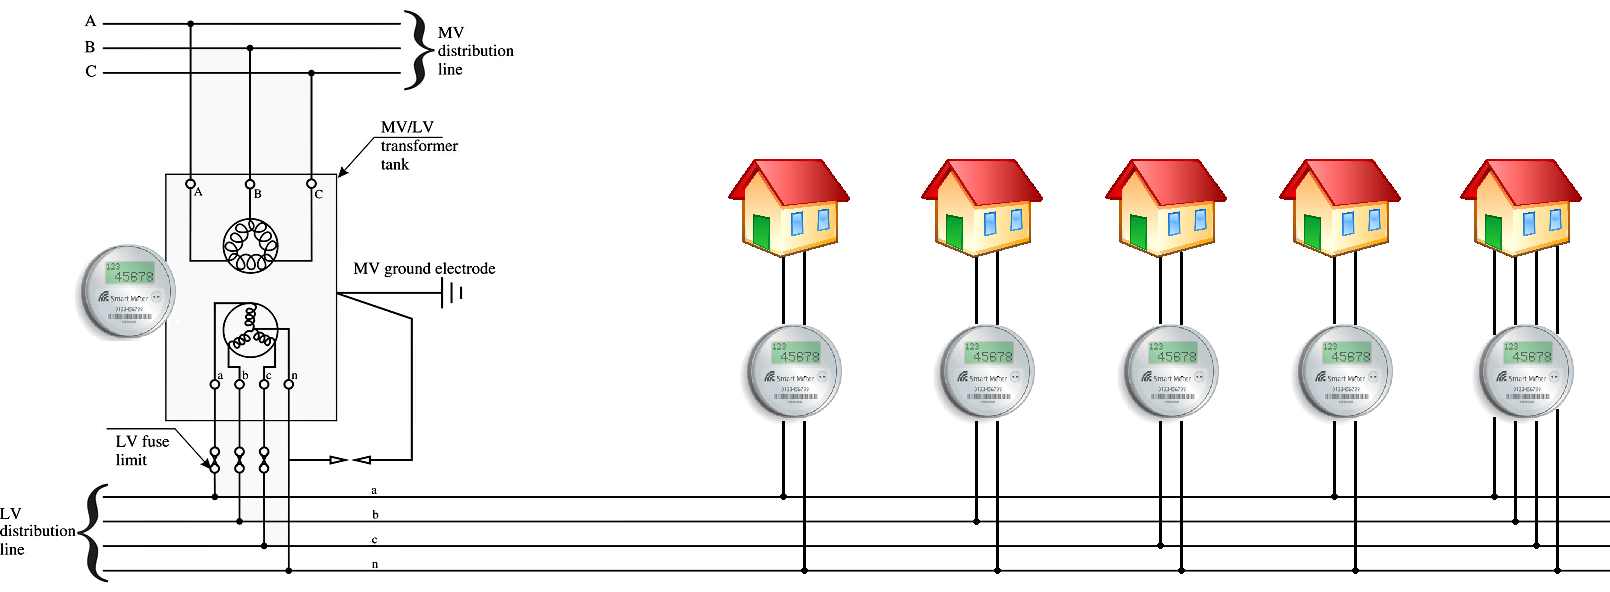

<b>Consider <i>N</i> customers whose connection phase assumes one out of three possible labels <i>a, b, </i> or <i> c</i> and estimate the correct customer-to-label assignment based on <i>M</i> readings whose per-phase values are a <i>function</i> of the corresponding phase-connected individual customer reading.</b>

## Problem Description

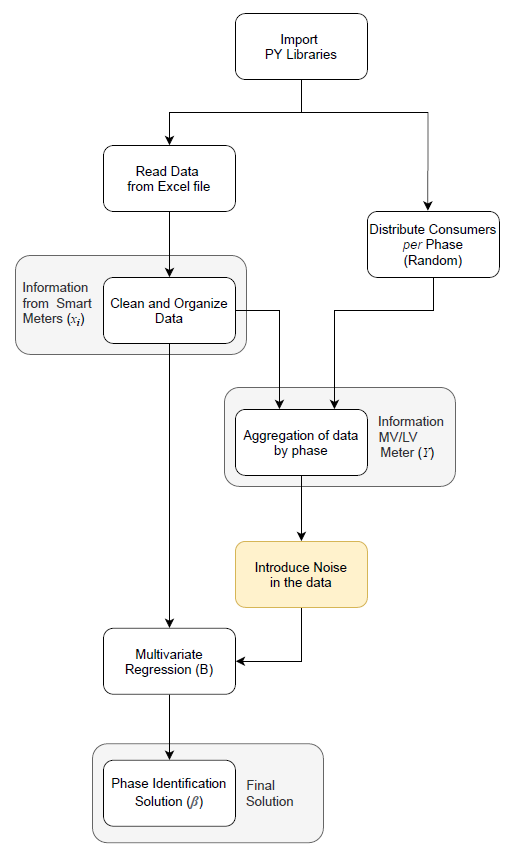

Import Python Libraries

In [64]:
import pandas as pd
import numpy as np
from numpy.random import randint   # To random values in the phases
from numpy.random import random   # To random values in the phases
import matplotlib.pyplot as plt


Parameters (It is possible to change to test different input data)

In [65]:
nc=4                        # Number of consumers (1 to nc)                  %%Data Notes: nc=4
ts=60                     #start period of analysis (Can be from 1 to 96)  %%Data Notes: ts=60
te=71                       #Last period of analysis (Can be from 1 to 96)   %%Data Notes: te=71
#phase = [3,2,1,3]            #To obtain the same values of lecture notes
noise = 0.25
phase = randint(1, 4, nc)  #To obtain random values

phase_idx = np.array(phase) - 1

print ("The distribution of consumers in each phase is: ", phase)

The distribution of consumers in each phase is:  [2 1 1 2]


Import data (From Excel file)

In [66]:
raw_data = np.array(pd.read_excel ('Prob1_Conso_Data.xlsx', header=None))

Clean and organize the data (delete zeros and organize by consumers)

In [67]:
checks=0
nr=1
data=np.zeros((1,96))
#h=np.arange(1/96, 1, 1/96).tolist()
h=raw_data[0:96,0]
for i in range(1,raw_data.shape[0]+1):
    if i==0:
        print(i)
    if raw_data[i-1,0]==h[checks]:
        checks=checks+1
    else:
        checks=0
    if checks==96:
        if np.sum(raw_data[i-96:i,1])!=0:
            data[nr-1,0:96]=raw_data[i-96:i,1]
            data.resize((nr+1,96))
            nr=nr+1
        checks=0
data.resize((nr-1,96))

data.shape[0]      #Can be deleted
print ("The number of consumers is ", data.shape[0], " and the number of periods is ", data.shape[1])

The number of consumers is  1390  and the number of periods is  96


Select data from consumers and period (Truncate the original matrix) 

In [68]:
data_Aux1=data[0:nc,:]
pw=data_Aux1[:,ts-1:te]


power = 4 * pw                      
power_T = power.T

print ("The matrix 'pw' represents the power measured by the smart meter in each consumer (i) in each period (k)")
print ("In the lecture notes, this value is represented by X.")
print ("The value of X is:\n",np.transpose(4*pw))   # We should multiply by 4 to obtain the same values of the lectures. 
                                                    # In fact the original values are the average energy consumption for
                                                    # 15 minutes. To obtain the power, we should multiply by 4  

The matrix 'pw' represents the power measured by the smart meter in each consumer (i) in each period (k)
In the lecture notes, this value is represented by X.
The value of X is:
 [[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]]


Consumers aggregation by phase and noise inclusion (normal distribution).

In [69]:
## Calculate the total power consumed in each phase (f) in each period (k)
# Create a matrix Y of size (number of periods, number of phases) to store the total power consumed in each phase in each period


n_periods = power_T.shape[0]   # Number of periods (rows) in the power_T matrix
Y = np.zeros((n_periods, 3))   # Initialize the Y matrix with zeros (3 columns for 3 phases)

for f in range(3):                 
    Y[:, f] = power_T[:, phase_idx == f].sum(axis=1)
print ("The matrix 'Y' represents the total power consumed in each phase (f) in each period (k)")
print ("In the lecture notes, this value is represented by Y.")
print ("The value of Y is:\n",Y)

# Add noise to Y with gaussian distribuition
Y_noisy = Y * (1 + noise * np.random.randn(*Y.shape))
print ("The matrix 'Y_noisy' represents the total power consumed in each phase (f) in each period (k) with noise added.")
print ("The value of Y_noisy is:\n",Y_noisy)

The matrix 'Y' represents the total power consumed in each phase (f) in each period (k)
In the lecture notes, this value is represented by Y.
The value of Y is:
 [[0.148 0.452 0.   ]
 [0.44  0.3   0.   ]
 [2.28  0.296 0.   ]
 [4.628 0.54  0.   ]
 [2.66  2.796 0.   ]
 [3.336 2.14  0.   ]
 [1.32  3.692 0.   ]
 [1.036 2.216 0.   ]
 [1.26  2.404 0.   ]
 [1.392 3.996 0.   ]
 [1.084 1.128 0.   ]
 [0.528 0.976 0.   ]]
The matrix 'Y_noisy' represents the total power consumed in each phase (f) in each period (k) with noise added.
The value of Y_noisy is:
 [[0.19588879 0.41489383 0.        ]
 [0.37122312 0.3414951  0.        ]
 [2.16912525 0.31115326 0.        ]
 [5.82692787 0.27800627 0.        ]
 [2.76962772 3.15353224 0.        ]
 [3.79663485 1.89683043 0.        ]
 [1.55760841 4.29028296 0.        ]
 [1.1159244  2.64875522 0.        ]
 [1.0895489  2.51913695 0.        ]
 [1.42740117 5.03860477 0.        ]
 [0.87284988 1.48078035 0.        ]
 [0.62791386 0.72655651 0.        ]]


Multivariate Regression 

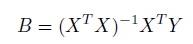

In [70]:
## Estimate the B matrix using least squares
B_est, residuals, rank, s = np.linalg.lstsq(power_T, Y_noisy, rcond=None) 
print("\nEstimated B matrix:\n", B_est)

# Calculate round B matrix 1 or 0 (highest value in each row is 1, the rest are 0)
B_round = np.zeros_like(B_est)
B_round[np.arange(B_est.shape[0]), B_est.argmax(axis=1)] = 1
print("\nRounded B matrix:\n", B_round)


Estimated B matrix:
 [[-0.07349912  1.19804262  0.        ]
 [ 1.27412154 -0.1780956   0.        ]
 [ 0.93322817  0.10551448  0.        ]
 [-0.03729731  1.20524348  0.        ]]

Rounded B matrix:
 [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


Check accuracy

In [71]:
# Print the phase distribution given 
print("\nActual phase distribution for each consumer:\n", phase)

# Convert rounded B matrix to phase labels (1, 2, or 3)
estimated_phases = np.argmax(B_round, axis=1) + 1  # Add 1 to convert from 0-indexed to 1-indexed
print("\nEstimated phase distribution for each consumer:\n", estimated_phases)

# Compare estimated phases with actual phases
accuracy = np.mean(estimated_phases == phase)

# Print the accuracy of the estimation
print("\nAccuracy of phase estimation: {:.2f}%".format(accuracy * 100))



Actual phase distribution for each consumer:
 [2 1 1 2]

Estimated phase distribution for each consumer:
 [2 1 1 2]

Accuracy of phase estimation: 100.00%


Plot

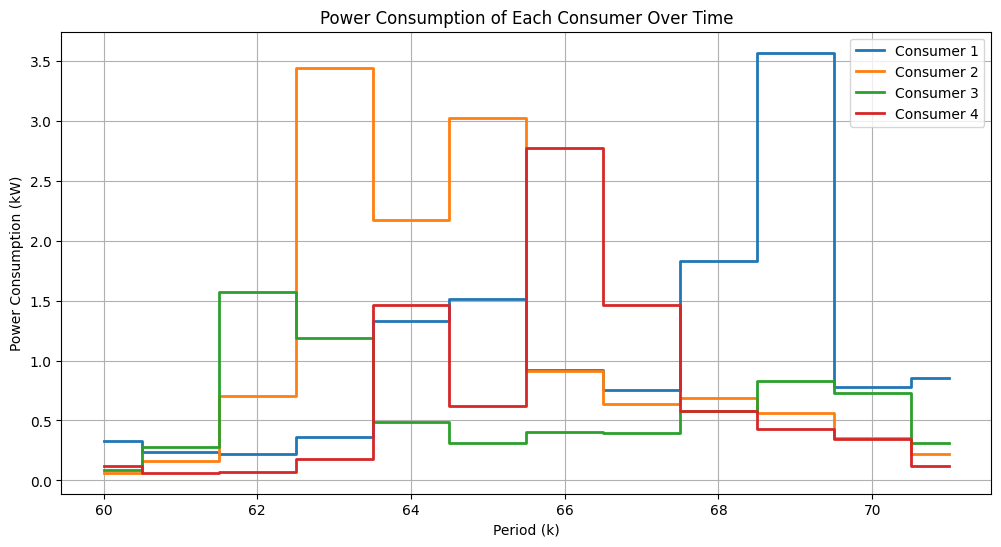

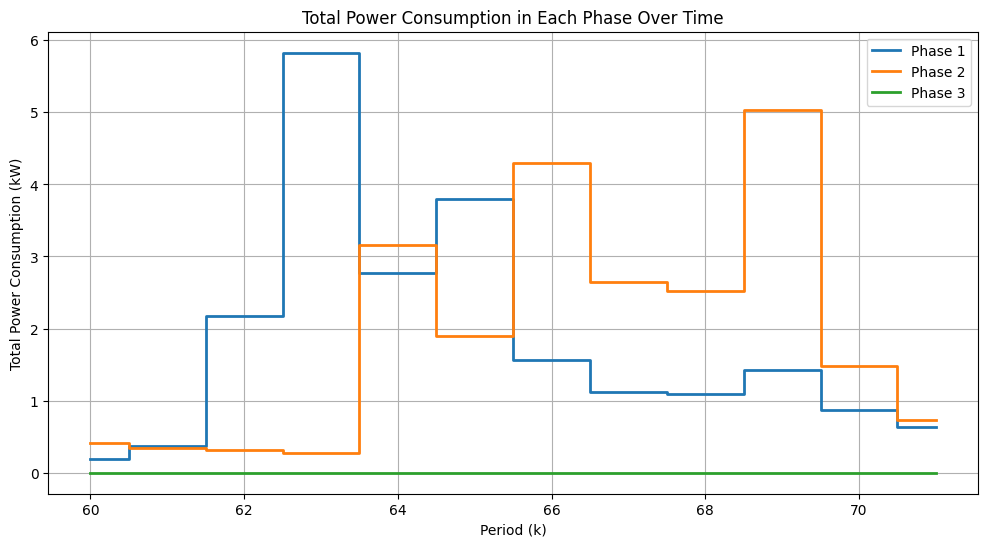

In [72]:
# Plot in the same graph the consumption of each consumer in each period

plt.figure(figsize=(12, 6))
for i in range(nc):
    plt.step(range(ts, te+1), power_T[:, i], label=f'Consumer {i+1}', where='mid', linewidth=2)
plt.title('Power Consumption of Each Consumer Over Time')
plt.xlabel('Period (k)')
plt.ylabel('Power Consumption (kW)')
plt.legend()
plt.grid()
plt.show()

# Plot of the power consuption of each phase in the substation in each period

plt.figure(figsize=(12, 6))
for f in range(3):
    plt.step(range(ts, te+1), Y_noisy[:, f], label=f'Phase {f+1}', where='mid', linewidth=2)
plt.title('Total Power Consumption in Each Phase Over Time')
plt.xlabel('Period (k)')
plt.ylabel('Total Power Consumption (kW)')
plt.legend()
plt.grid()
plt.show()



In [73]:
def compute_phase_accuracy(power_T, Y_noisy, phase_true):
    """
    Computes phase estimation accuracy using least squares.
    
    Args:
        power_T: Power matrix transposed (periods x consumers)
        Y_noisy: Noisy phase aggregates (periods x 3)
        phase_true: True phase assignment (array of length nc)
    
    Returns:
        accuracy: Float between 0 and 1
        estimated_phases: Estimated phase labels
        B_round: Rounded coefficient matrix
    """
    try:
        B_est, _, _, _ = np.linalg.lstsq(power_T, Y_noisy, rcond=None)
        B_round = np.zeros_like(B_est)
        B_round[np.arange(B_est.shape[0]), B_est.argmax(axis=1)] = 1
        estimated_phases = np.argmax(B_round, axis=1) + 1
        accuracy = np.mean(estimated_phases == phase_true)
        return accuracy, estimated_phases, B_round
    except Exception as e:
        return 0, None, None

def analyze_noise_impact(data, nc_variations, noise_levels, ts_start=60, te_start=65):
    """
    Analyzes impact of noise on accuracy across multiple consumer counts and window sizes.
    Only considers window sizes larger than the number of consumers.
    
    Args:
        data: Input consumption data matrix
        nc_variations: List of consumer counts to test
        noise_levels: List of noise levels to test
        ts_start: Starting period
        te_start: Ending period
    
    Returns:
        results: Dict mapping (nc, noise) -> list of accuracies across windows
        windows_tested: Dict mapping nc -> list of window sizes
    """
    results = {}
    windows_tested = {}
    
    for nc in nc_variations:
        phase = randint(1, 4, nc)
        phase_idx = np.array(phase) - 1
        windows_tested[nc] = []
        
        ts = ts_start
        te = te_start
        
        # Collect all window sizes first
        all_windows = []
        while ts > 1:
            window_size = te - ts + 1
            if window_size > nc:  # Only include windows larger than number of consumers
                all_windows.append((ts, te, window_size))
            ts -= 1
        
        ts = 1
        while te <= 96:
            window_size = te - ts + 1
            if window_size > nc:  # Only include windows larger than number of consumers
                all_windows.append((ts, te, window_size))
            te += 1
        
        # Test each noise level
        for noise in noise_levels:
            results[(nc, noise)] = []
            
            for ts, te, window_size in all_windows:
                data_Aux1 = data[0:nc, :]
                pw = data_Aux1[:, ts-1:te]
                power = 4 * pw
                power_T = power.T
                
                Y = np.zeros((power_T.shape[0], 3))
                for f in range(3):
                    Y[:, f] = power_T[:, phase_idx == f].sum(axis=1)
                
                Y_noisy = Y * (1 + noise * np.random.randn(*Y.shape))
                accuracy, _, _ = compute_phase_accuracy(power_T, Y_noisy, phase)
                results[(nc, noise)].append(accuracy)
        
        windows_tested[nc] = [w[2] for w in all_windows]
    
    return results, windows_tested

def plot_noise_analysis(results, windows_tested, nc_variations, noise_levels):
    """
    Generates heatmap and line plots showing noise impact on accuracy.
    """
    # Create heatmap: rows=nc, cols=noise
    heatmap_data = np.zeros((len(nc_variations), len(noise_levels)))
    
    for i, nc in enumerate(nc_variations):
        for j, noise in enumerate(noise_levels):
            key = (nc, noise)
            if key in results:
                heatmap_data[i, j] = np.mean(results[key])
    
    plt.figure(figsize=(12, 6))
    im = plt.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    plt.colorbar(im, label='Mean Accuracy')
    plt.xticks(range(len(noise_levels)), [f'{n:.2f}' for n in noise_levels], rotation=45)
    plt.yticks(range(len(nc_variations)), nc_variations)
    plt.xlabel('Noise Level')
    plt.ylabel('Number of Consumers')
    plt.title('Impact of Noise on Phase Estimation Accuracy')
    plt.tight_layout()
    plt.show()
    
    # Line plot: accuracy vs window size for selected noise levels
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    noise_indices = [0, len(noise_levels)//2, -1]
    
    for plot_idx, noise_idx in enumerate(noise_indices):
        ax = axes[plot_idx]
        noise = noise_levels[noise_idx]
        
        for nc in nc_variations:
            key = (nc, noise)
            if key in results:
                windows = windows_tested[nc]
                accuracies = results[key]
                ax.plot(windows, np.array(accuracies)*100, marker='o', label=f'{nc} consumers')
        
        ax.set_xlabel('Window Size')
        ax.set_ylabel('Accuracy (%)')
        ax.set_title(f'Noise Level: {noise:.3f}')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

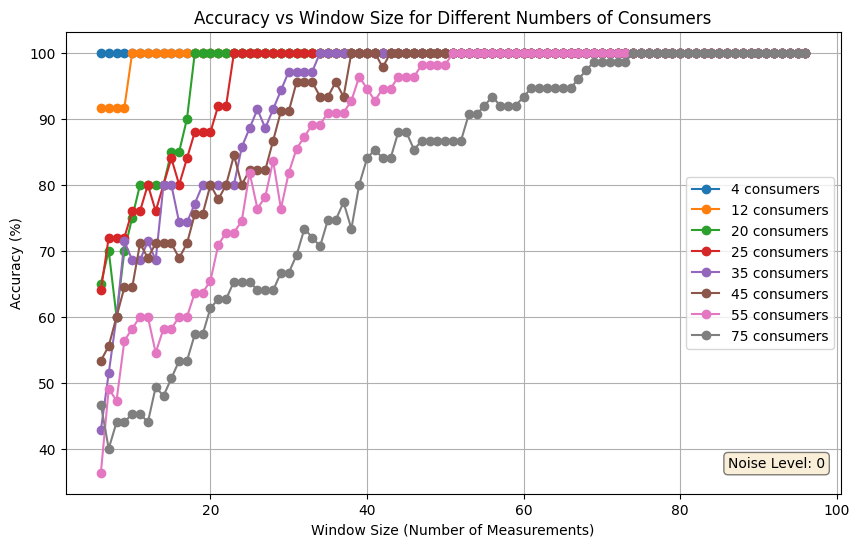

Analyzing noise impact across different consumer counts and window sizes...
Generating visualizations...


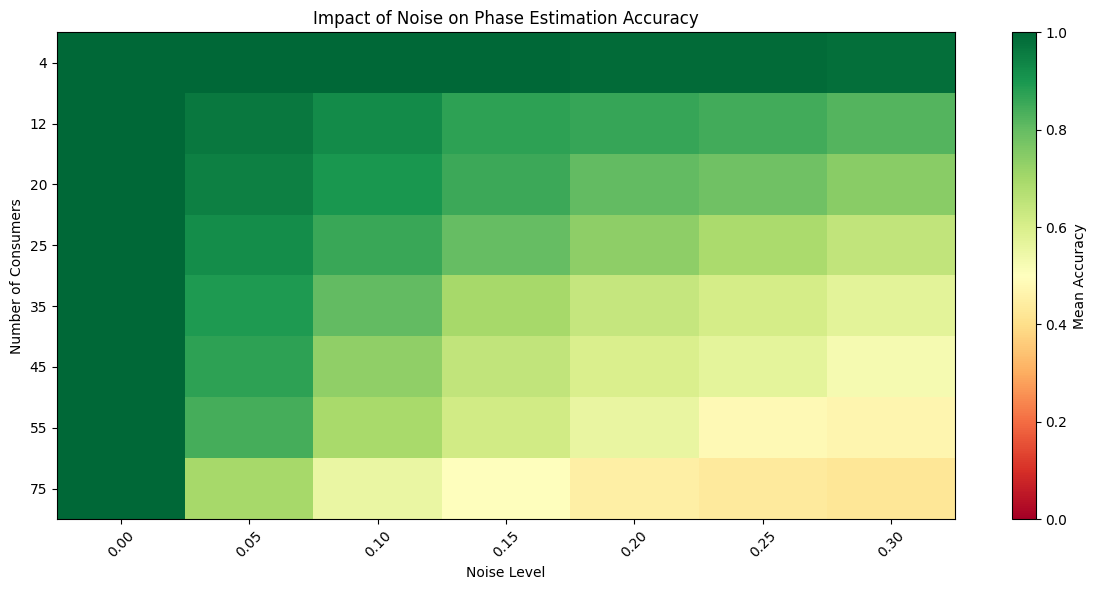

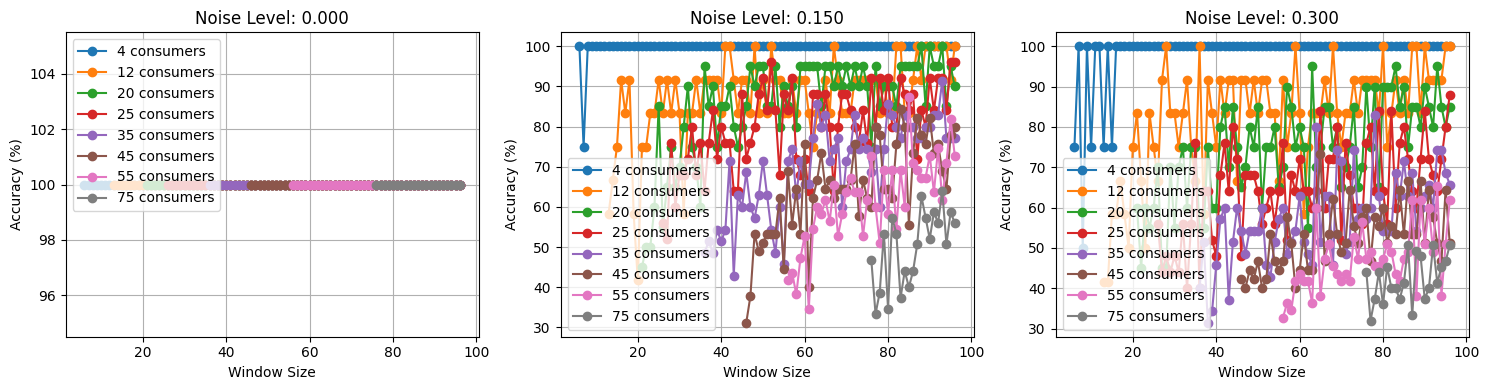

In [74]:
# Analysis of acceptable limits of:
# - number of measurements in function of number of consumers
# - noise for different numbers of consumers and measurements

goal_accuracy = 1.0  # 100%
nc_variations = [4, 12, 20, 25, 35, 45, 55, 75]
results = {}
accuracy_curves = {}

for nc in nc_variations:
    found = False
    accuracies = []
    windows = []

    # Generate phase assignment ONCE per nc
    phase = randint(1, 4, nc)
    phase_idx = np.array(phase) - 1

    # Start with ts=60, te=65
    ts = 60
    te = 65

    # Lower ts until 1 (te fixed)
    while ts > 1:
        window_size = te - ts + 1

        data_Aux1 = data[0:nc, :]
        pw = data_Aux1[:, ts-1:te]
        power = 4 * pw
        power_T = power.T

        Y = np.zeros((power_T.shape[0], 3))
        for f in range(3):
            Y[:, f] = power_T[:, phase_idx == f].sum(axis=1)

        noise = 0
        noise_matrix = noise * np.random.randn(*Y.shape)
        Y_noisy = Y + noise_matrix

        try:
            B_est, residuals, rank, s = np.linalg.lstsq(power_T, Y_noisy, rcond=None)
            B_round = np.zeros_like(B_est)
            B_round[np.arange(B_est.shape[0]), B_est.argmax(axis=1)] = 1
            estimated_phases = np.argmax(B_round, axis=1) + 1
            accuracy = np.mean(estimated_phases == phase)
        except Exception as e:
            accuracy = 0

        accuracies.append(accuracy)
        windows.append(window_size)
        if not found and accuracy >= goal_accuracy:
            results[nc] = window_size
            found = True

        ts -= 1

    # Now ts == 1, increase te until 96
    while te <= 96:
        window_size = te - ts + 1

        data_Aux1 = data[0:nc, :]
        pw = data_Aux1[:, ts-1:te]
        power = 4 * pw
        power_T = power.T

        Y = np.zeros((power_T.shape[0], 3))
        for f in range(3):
            Y[:, f] = power_T[:, phase_idx == f].sum(axis=1)

        noise = 0
        noise_matrix = noise * np.random.randn(*Y.shape)
        Y_noisy = Y + noise_matrix

        try:
            B_est, residuals, rank, s = np.linalg.lstsq(power_T, Y_noisy, rcond=None)
            B_round = np.zeros_like(B_est)
            B_round[np.arange(B_est.shape[0]), B_est.argmax(axis=1)] = 1
            estimated_phases = np.argmax(B_round, axis=1) + 1
            accuracy = np.mean(estimated_phases == phase)
        except Exception as e:
            accuracy = 0

        accuracies.append(accuracy)
        windows.append(window_size)
        if not found and accuracy >= goal_accuracy:
            results[nc] = window_size
            found = True

        te += 1

    if not found:
        results[nc] = None
    accuracy_curves[nc] = (windows, accuracies)

# Plotting
plt.figure(figsize=(10, 6))
for nc in nc_variations:
    windows, accuracies = accuracy_curves[nc]
    plt.plot(windows, [a*100 for a in accuracies], marker='o', label=f'{nc} consumers')
plt.xlabel('Window Size (Number of Measurements)')
plt.ylabel('Accuracy (%)')
plt.title(f'Accuracy vs Window Size for Different Numbers of Consumers')
plt.text(0.98, 0.05, f'Noise Level: {noise}', transform=plt.gca().transAxes, 
         ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend()
plt.grid(True)
plt.show()

nc_variations = [4, 12, 20, 25, 35, 45, 55, 75]
noise_levels = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

print("Analyzing noise impact across different consumer counts and window sizes...")
results, windows_tested = analyze_noise_impact(data, nc_variations, noise_levels)

print("Generating visualizations...")
plot_noise_analysis(results, windows_tested, nc_variations, noise_levels)

# Extra Challenges
Think about an interesting variation to this problem or a different way to solve and implement it !!!

Some ideas:
- What happens if we have two consumers with the same consumption ? What about if the difference is very small ? Can we quantify the sensitivity ?
- What happens if we have three-phase clients ? Can we follow the same approach ?

Número de consumidores lidos: 1390

Executando 200 iterações da análise de sensibilidade...
  Iteração 10/200
  Iteração 20/200
  Iteração 30/200
  Iteração 40/200
  Iteração 50/200
  Iteração 60/200
  Iteração 70/200
  Iteração 80/200
  Iteração 90/200
  Iteração 100/200
  Iteração 110/200
  Iteração 120/200
  Iteração 130/200
  Iteração 140/200
  Iteração 150/200
  Iteração 160/200
  Iteração 170/200
  Iteração 180/200
  Iteração 190/200
  Iteração 200/200

ESTATÍSTICAS DA ANÁLISE DE SENSIBILIDADE (200 iterações)
Ruído      k_min (média)      Std Dev         Min        Max        Count    CI 95%                        
----------------------------------------------------------------------------------------------------
0.000      0.089              0.037           0.050      0.200      200      [0.084, 0.094]                
0.050      0.094              0.035           0.050      0.200      200      [0.089, 0.098]                
0.100      0.107              0.035           0.050   

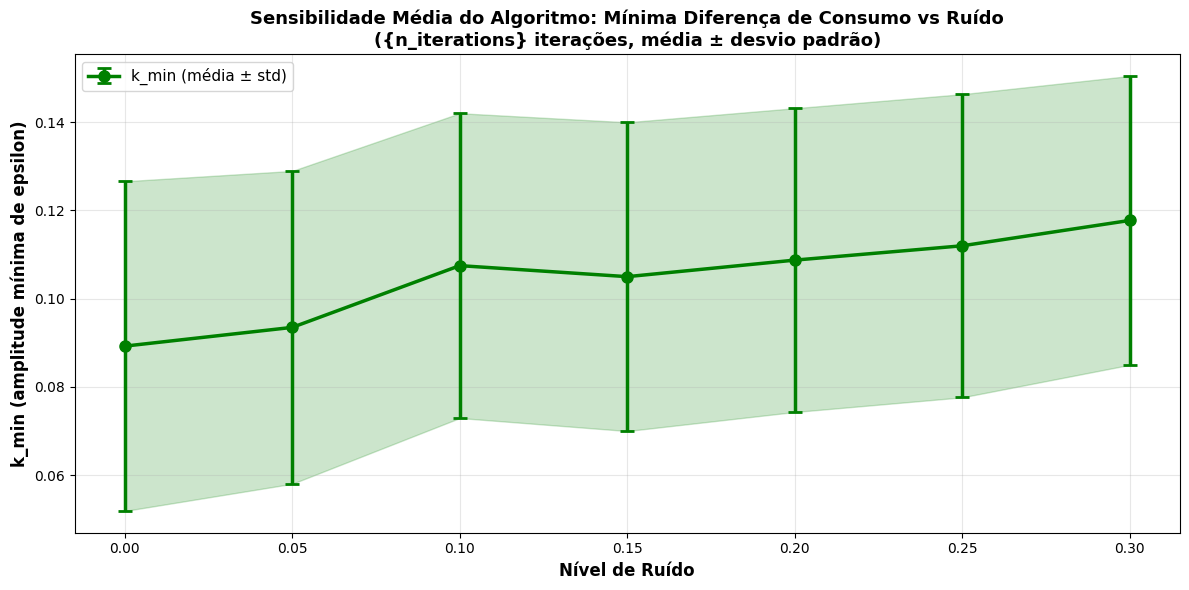

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17376\245798644.py:232: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(k_min_lists, labels=[f'{n:.2f}' for n in valid_noises_bp], patch_artist=True)


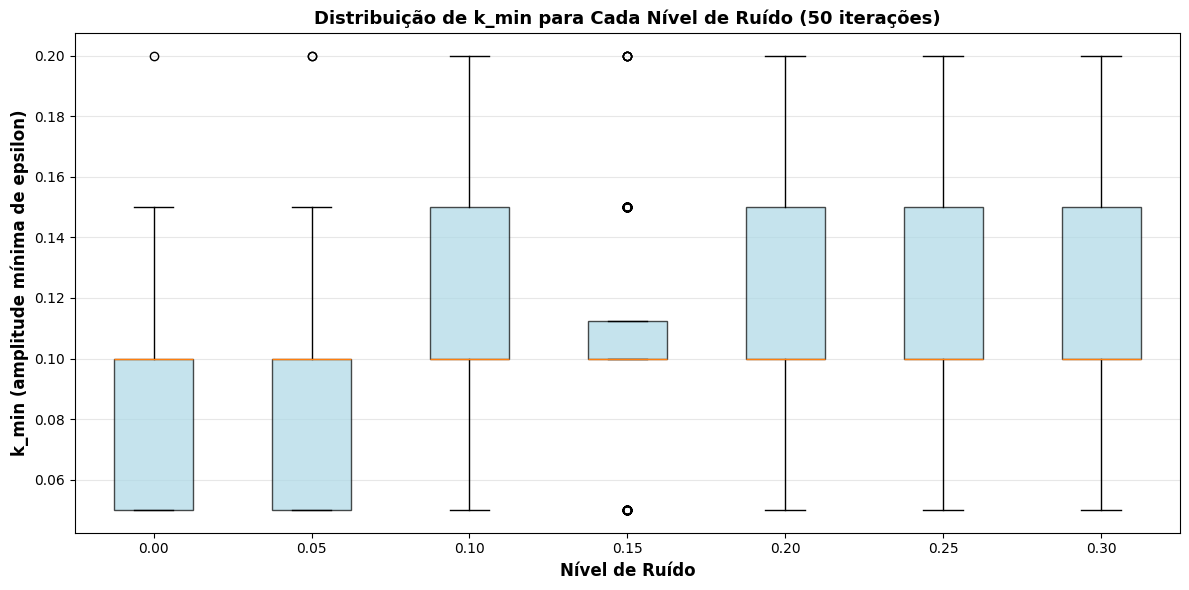

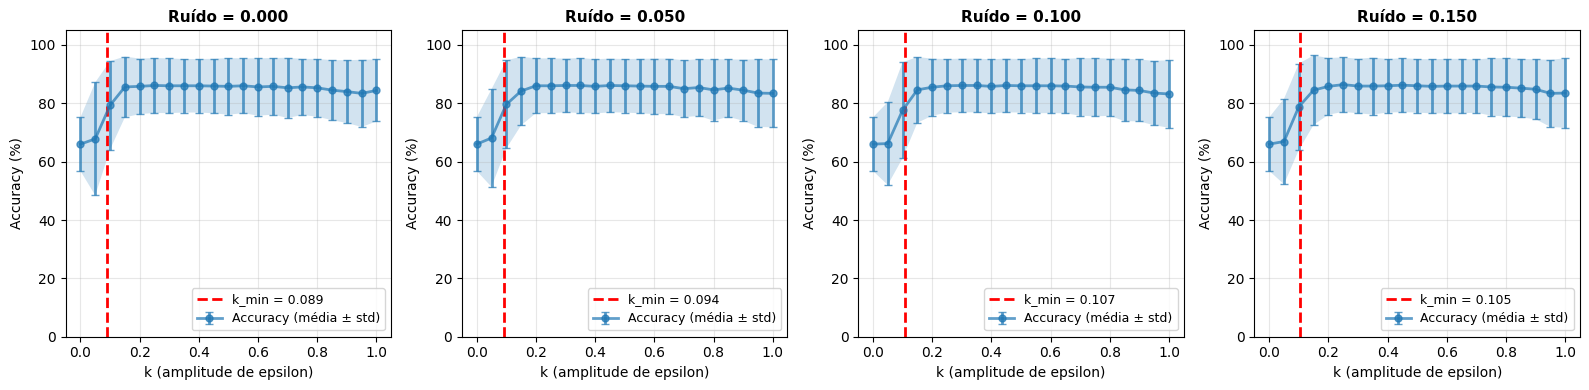

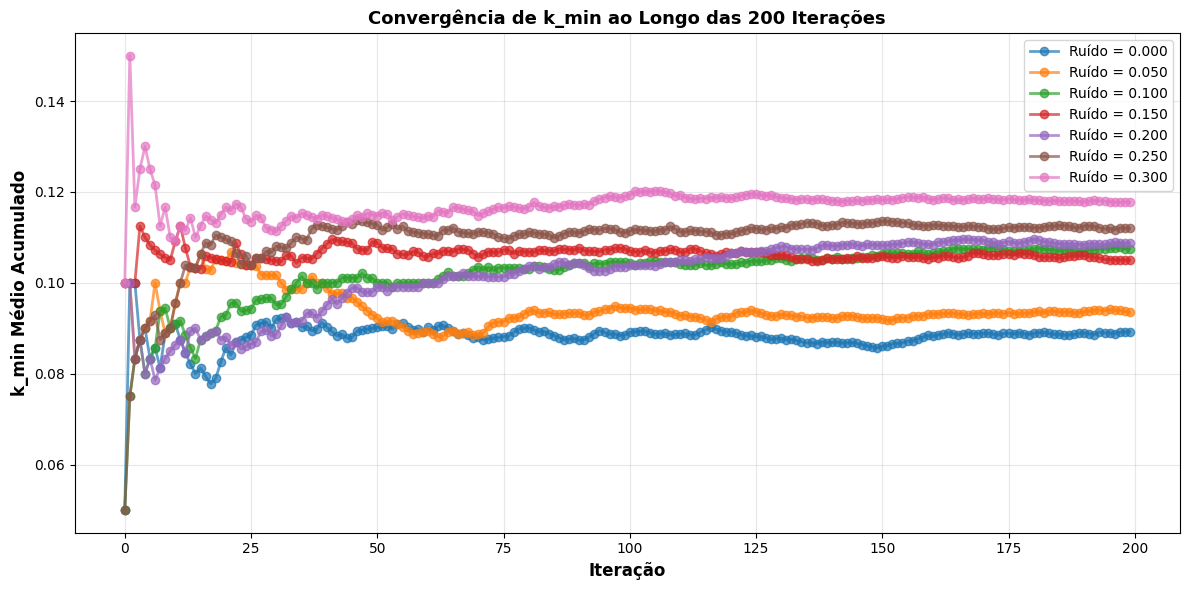

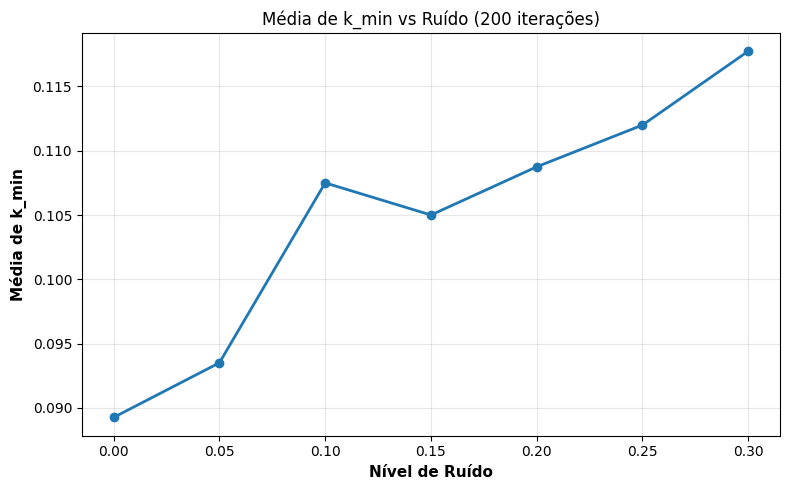

In [75]:
# Idea 1
# What happens if we have two consumers with the same consumption? What about if the difference is very small? Can we quantify the sensitivity?

# Try SVD to estimate the B matrix instead of least squares

# Parâmetros base
nc = 5          # número de consumidores a usar
ts = 60         # início do intervalo temporal (1–96)
te = 71         # fim do intervalo temporal (1–96)
energy_threshold = 0.99  # percentagem de energia mantida no low-rank SVD
n_iterations = 200  # número de iterações para média

# Ler dados do Excel e construir matriz data
raw_data = np.array(pd.read_excel('Prob1_Conso_Data.xlsx', header=None))

checks = 0
nr = 1
data = np.zeros((1, 96))
h = raw_data[0:96, 0]

for i in range(1, raw_data.shape[0] + 1):
    if raw_data[i - 1, 0] == h[checks]:
        checks += 1
    else:
        checks = 0
    if checks == 96:
        if np.sum(raw_data[i - 96:i, 1]) != 0:
            data[nr - 1, 0:96] = raw_data[i - 96:i, 1]
            data.resize((nr + 1, 96))
            nr += 1
        checks = 0

data.resize((nr - 1, 96))
print("Número de consumidores lidos:", data.shape[0])

# Função para construir Y a partir de X e phases
def build_Y(power_T, phase_idx):
    n_periods = power_T.shape[0]
    Y = np.zeros((n_periods, 3))
    for f in range(3):
        Y[:, f] = power_T[:, phase_idx == f].sum(axis=1)
    return Y

# Função para resolver com SVD low-rank
def solve_with_svd_lowrank(X, Y, energy_threshold=0.99):
    # X: (K x N), Y: (K x 3)
    U, S, Vt = np.linalg.svd(X, full_matrices=False)

    # escolher rank r com base na energia acumulada
    energy = np.cumsum(S**2) / np.sum(S**2)
    r = np.searchsorted(energy, energy_threshold) + 1

    U_r = U[:, :r]
    S_r = S[:r]
    Vt_r = Vt[:r, :]

    # aproximação low-rank de X
    X_r = U_r @ np.diag(S_r) @ Vt_r

    # resolver mínimos quadrados em X_r B ≈ Y
    B_est, residuals, rank, s = np.linalg.lstsq(X_r, Y, rcond=None)
    return B_est, S, r

def run_single_sensitivity_analysis(data, nc, ts, te, noise_levels, ks, energy_threshold=0.99):
    """Executa uma iteração completa de análise de sensibilidade"""
    c1_base = data[0, :].copy()
    phase = randint(1, 4, nc)
    phase[0], phase[1] = 1, 2
    phase_idx = phase - 1
    
    results_by_noise = {}
    
    for noise in noise_levels:
        results = []
        for k in ks:
            data_Aux1 = data[0:nc, :].copy()
            data_Aux1[0, :] = c1_base
            epsilon = k * np.random.randn(*c1_base.shape) if k > 0 else np.zeros_like(c1_base)
            data_Aux1[1, :] = c1_base + epsilon
            
            pw = data_Aux1[:, ts-1:te]
            power = 4 * pw
            power_T = power.T
            
            Y = build_Y(power_T, phase_idx)
            noise_matrix = noise * np.random.randn(*Y.shape)
            Y_noisy = Y * (1 + noise_matrix)
            
            B_est, _, _ = solve_with_svd_lowrank(power_T, Y_noisy, energy_threshold)
            B_round = np.zeros_like(B_est)
            B_round[np.arange(B_est.shape[0]), B_est.argmax(axis=1)] = 1
            estimated_phases = np.argmax(B_round, axis=1) + 1
            
            accuracy = np.mean(estimated_phases == phase)
            c1_ok = estimated_phases[0] == phase[0]
            c2_ok = estimated_phases[1] == phase[1]
            
            results.append({
                "k": k, "accuracy": accuracy, "c1_ok": c1_ok, "c2_ok": c2_ok,
                "epsilon": epsilon.copy(), "c1_base": c1_base.copy()
            })
        
        # Encontrar k_min
        k_min = None
        best_case = None
        for res in results:
            if res["c1_ok"] and res["c2_ok"]:
                k_min = res["k"]
                best_case = res
                break
        
        results_by_noise[noise] = (k_min, best_case, results)
    
    return results_by_noise

def run_multiple_iterations(data, nc, ts, te, noise_levels, ks, n_iterations=n_iterations):
    """Executa análise de sensibilidade N vezes e computa estatísticas"""
    all_k_mins = {noise: [] for noise in noise_levels}
    all_results = {noise: [] for noise in noise_levels}
    
    print(f"\nExecutando {n_iterations} iterações da análise de sensibilidade...")
    for iteration in range(n_iterations):
        if (iteration + 1) % 10 == 0:
            print(f"  Iteração {iteration + 1}/{n_iterations}")
        
        results_by_noise = run_single_sensitivity_analysis(data, nc, ts, te, noise_levels, ks, energy_threshold)
        
        for noise in noise_levels:
            k_min, best_case, results = results_by_noise[noise]
            if k_min is not None:
                all_k_mins[noise].append(k_min)
            all_results[noise].append(results)
    
    # Computar estatísticas
    statistics = {}
    for noise in noise_levels:
        k_mins = all_k_mins[noise]
        if len(k_mins) > 0:
            k_mins_array = np.array(k_mins)
            mean_val = np.mean(k_mins_array)
            std_val = np.std(k_mins_array)
            se = std_val / np.sqrt(len(k_mins))
            ci_lower = mean_val - 1.96 * se
            ci_upper = mean_val + 1.96 * se
            
            statistics[noise] = {
                'mean': mean_val,
                'std': std_val,
                'min': np.min(k_mins_array),
                'max': np.max(k_mins_array),
                'count': len(k_mins),
                'ci_lower': ci_lower,
                'ci_upper': ci_upper,
                'se': se
            }
        else:
            statistics[noise] = {'mean': None, 'std': None, 'count': 0}
    
    return statistics, all_k_mins, all_results

def plot_sensitivity_statistics(noise_levels, statistics):
    """Plota k_min média ± std vs nível de ruído"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    valid_noises = []
    means = []
    stds = []
    
    for noise in noise_levels:
        if noise in statistics and statistics[noise]['count'] > 0:
            valid_noises.append(noise)
            means.append(statistics[noise]['mean'])
            stds.append(statistics[noise]['std'])
    
    if means:
        means = np.array(means)
        stds = np.array(stds)
        
        # Plot com barras de erro
        ax.errorbar(valid_noises, means, yerr=stds, fmt='o-', linewidth=2.5, 
                   markersize=8, capsize=5, capthick=2, label='k_min (média ± std)', color='green')
        
        # Preencher zona de incerteza
        ax.fill_between(valid_noises, means - stds, means + stds, alpha=0.2, color='green')
        
        ax.set_xlabel('Nível de Ruído', fontsize=12, fontweight='bold')
        ax.set_ylabel('k_min (amplitude mínima de epsilon)', fontsize=12, fontweight='bold')
        ax.set_title('Sensibilidade Média do Algoritmo: Mínima Diferença de Consumo vs Ruído\n({n_iterations} iterações, média ± desvio padrão)', 
                    fontsize=13, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()

def print_statistics(noise_levels, statistics):
    """Imprime tabela detalhada de estatísticas"""
    print("\n" + "="*100)
    print(f"ESTATÍSTICAS DA ANÁLISE DE SENSIBILIDADE ({n_iterations} iterações)")
    print("="*100)
    print(f"{'Ruído':<10} {'k_min (média)':<18} {'Std Dev':<15} {'Min':<10} {'Max':<10} {'Count':<8} {'CI 95%':<30}")
    print("-" * 100)
    for noise in noise_levels:
        if noise in statistics and statistics[noise]['count'] > 0:
            stat = statistics[noise]
            ci_str = f"[{stat['ci_lower']:.3f}, {stat['ci_upper']:.3f}]"
            print(f"{noise:<10.3f} {stat['mean']:<18.3f} {stat['std']:<15.3f} "
                  f"{stat['min']:<10.3f} {stat['max']:<10.3f} {stat['count']:<8} {ci_str:<30}")
        else:
            print(f"{noise:<10.3f} {'N/A':<18} {'N/A':<15} {'N/A':<10} {'N/A':<10} {'0':<8}")

# ========== ANÁLISE COM MÚLTIPLAS ITERAÇÕES ==========
noise_levels = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ks = np.linspace(0, 1.0, 21)  # amplitude de epsilon

# Executar análise com 50 iterações
statistics, all_k_mins, all_results = run_multiple_iterations(data, nc, ts, te, noise_levels, ks, n_iterations=n_iterations)

# Imprimir estatísticas
print_statistics(noise_levels, statistics)

# Gráfico 1: k_min vs Ruído (COM BARRAS DE ERRO)
print("\nGerando gráficos...")
plot_sensitivity_statistics(noise_levels, statistics)

# Gráfico 2: Distribuição de k_min para cada ruído (box plots)
fig, ax = plt.subplots(figsize=(12, 6))

k_min_lists = [all_k_mins[noise] for noise in noise_levels if all_k_mins[noise]]
valid_noises_bp = [noise for noise in noise_levels if all_k_mins[noise]]

bp = ax.boxplot(k_min_lists, labels=[f'{n:.2f}' for n in valid_noises_bp], patch_artist=True)

# Colorir os boxes
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_xlabel('Nível de Ruído', fontsize=12, fontweight='bold')
ax.set_ylabel('k_min (amplitude mínima de epsilon)', fontsize=12, fontweight='bold')
ax.set_title('Distribuição de k_min para Cada Nível de Ruído (50 iterações)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Gráfico 3: Accuracy vs k para alguns ruídos (agregado de todas as iterações)
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, noise in enumerate(noise_levels[:4]):
    ax = axes[idx]
    all_res = all_results[noise]
    
    # Agregar accuracies de todas as iterações
    ks_plot = None
    accuracies_by_k = {}
    
    for iteration_results in all_res:
        for res in iteration_results:
            k = res["k"]
            acc = res["accuracy"]
            
            if k not in accuracies_by_k:
                accuracies_by_k[k] = []
            accuracies_by_k[k].append(acc)
    
    ks_sorted = sorted(accuracies_by_k.keys())
    mean_accs = [np.mean(accuracies_by_k[k]) for k in ks_sorted]
    std_accs = [np.std(accuracies_by_k[k]) for k in ks_sorted]
    
    ax.errorbar(ks_sorted, np.array(mean_accs)*100, yerr=np.array(std_accs)*100, 
               fmt='o-', linewidth=2, markersize=5, capsize=3, alpha=0.7, label='Accuracy (média ± std)')
    ax.fill_between(ks_sorted, (np.array(mean_accs) - np.array(std_accs))*100, 
                     (np.array(mean_accs) + np.array(std_accs))*100, alpha=0.2)
    
    # Marcar k_min médio
    if statistics[noise]['count'] > 0:
        k_min_val = statistics[noise]['mean']
        ax.axvline(x=k_min_val, color='r', linestyle='--', linewidth=2, 
                  label=f'k_min = {k_min_val:.3f}')
    
    ax.set_xlabel('k (amplitude de epsilon)', fontsize=10)
    ax.set_ylabel('Accuracy (%)', fontsize=10)
    ax.set_title(f'Ruído = {noise:.3f}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_ylim([0, 105])

plt.tight_layout()
plt.show()

# Gráfico 4: Convergência de k_min ao longo das iterações
fig, ax = plt.subplots(figsize=(12, 6))

for noise in noise_levels:
    if all_k_mins[noise]:
        running_mean = np.cumsum(all_k_mins[noise]) / np.arange(1, len(all_k_mins[noise]) + 1)
        ax.plot(running_mean, marker='o', label=f'Ruído = {noise:.3f}', linewidth=2, alpha=0.7)

ax.set_xlabel('Iteração', fontsize=12, fontweight='bold')
ax.set_ylabel('k_min Médio Acumulado', fontsize=12, fontweight='bold')
ax.set_title(f'Convergência de k_min ao Longo das {n_iterations} Iterações', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

valid_noises = []
mean_kmins = []
for noise in noise_levels:
    stat = statistics.get(noise, {})
    if stat.get('count', 0) > 0:
        valid_noises.append(noise)
        mean_kmins.append(stat['mean'])
    else:
        valid_noises.append(noise)
        mean_kmins.append(np.nan)

plt.figure(figsize=(8, 5))
plt.plot(valid_noises, mean_kmins, 'o-', color='tab:blue', linewidth=2, markersize=6)
plt.xlabel('Nível de Ruído', fontsize=11, fontweight='bold')
plt.ylabel('Média de k_min', fontsize=11, fontweight='bold')
plt.title(f'Média de k_min vs Ruído ({n_iterations} iterações)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Idea 2
# What happens if we have three-phase clients? Can we follow the same approach?

nc = 4
ts = 60
te = 71

# Specify three-phase consumer indices (0-indexed)
triphase_indices = [0]  # Consumer at index 0 is three-phase
num_triphase = len(triphase_indices)

# Create phase array: 0 for three-phase, random 1-3 for single-phase
phase = np.zeros(nc, dtype=int)
single_phase_indices = [i for i in range(nc) if i not in triphase_indices]
phase[single_phase_indices] = randint(1, 4, len(single_phase_indices))

noise = 0.1

phase_idx = np.array(phase) - 1
raw_data = np.array(pd.read_excel ('Prob1_Conso_Data.xlsx', header=None))

checks = 0
nr = 1
data = np.zeros((1, 96))
h = raw_data[0:96, 0]
for i in range(1, raw_data.shape[0] + 1):
    if i == 0:
        print(i)
    if raw_data[i - 1, 0] == h[checks]:
        checks += 1
    else:
        checks = 0
    if checks == 96:
        if np.sum(raw_data[i - 96:i, 1]) != 0:
            data[nr - 1, 0:96] = raw_data[i - 96:i, 1]
            data.resize((nr + 1, 96))
            nr += 1
        checks = 0
data.resize((nr - 1, 96))

data_Aux1 = data[0:nc, :]
pw = data_Aux1[:, ts - 1:te]

power = 4 * pw
power_T = power.T
n_periods = power_T.shape[0]
Y = np.zeros((n_periods, 3))

# Calculate Y considering three-phase consumers
for f in range(3):
    # Add single-phase consumers on phase f
    single_phase_mask = (np.array(phase) == f + 1)
    Y[:, f] = power_T[:, single_phase_mask].sum(axis=1)
    
    # Add 1/3 of three-phase consumers to each phase
    triphase_mask = (np.array(phase) == 0)
    Y[:, f] += power_T[:, triphase_mask].sum(axis=1) / 3.0

Y_noisy = Y * (1 + noise * np.random.randn(*Y.shape))
B_est, residuals, rank, s = np.linalg.lstsq(power_T, Y_noisy, rcond=None)

# Create B_round accounting for three-phase consumers
B_round = np.zeros_like(B_est)
triphase_mask = (np.array(phase) == 0)

for i in range(B_est.shape[0]):
    if triphase_mask[i]:
        # Three-phase consumer: assign 1/3 to each phase
        B_round[i, :] = 1
    else:
        # Single-phase consumer: assign 1 to the phase with highest value
        B_round[i, B_est[i, :].argmax()] = 1

# estimated phases, taken into account that three-phase consumers are marked as 0
estimated_phases = np.zeros(B_round.shape[0], dtype=int)
for i in range(B_round.shape[0]):
    if triphase_mask[i]:
        estimated_phases[i] = 0  # Mark three-phase consumers as 0
    else:
        estimated_phases[i] = B_round[i, :].argmax() + 1  # Single-phase consumer

print("Phase distribution for each consumer:\n", phase)
print("Estimated phases:\n", estimated_phases)
print("B_round matrix:\n", B_round)
print("Note: Consumers marked as 0 are known to be three-phase consumers.")
accuracy = np.mean(estimated_phases == phase)
print("Accuracy:", accuracy)

# Gráfico 1: Consumo de cada consumidor ao longo do tempo
plt.figure(figsize=(12, 6))
for i in range(nc):
    phase_label = "Trifásico" if phase[i] == 0 else f"Fase {phase[i]}"
    plt.step(range(ts, te+1), power_T[:, i], label=f'Consumidor {i+1} ({phase_label})', where='mid', linewidth=2)
plt.title('Consumo de Potência de Cada Consumidor ao Longo do Tempo', fontsize=13, fontweight='bold')
plt.xlabel('Período (k)', fontsize=11, fontweight='bold')
plt.ylabel('Consumo de Potência (kW)', fontsize=11, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Consumo agregado de cada fase ao longo do tempo
plt.figure(figsize=(12, 6))
for f in range(3):
    plt.step(range(ts, te+1), Y_noisy[:, f], label=f'Fase {f+1}', where='mid', linewidth=2.5, marker='o')
plt.title('Consumo de Potência Agregado de Cada Fase (com Ruído)', fontsize=13, fontweight='bold')
plt.xlabel('Período (k)', fontsize=11, fontweight='bold')
plt.ylabel('Consumo Agregado (kW)', fontsize=11, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()